# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [15]:
data = pd.read_csv('weight-height.csv')
df = pd.DataFrame(data)
male_df = df.loc[df['Gender'] == 'Male'] 
female_df = df.loc[df['Gender'] == 'Female']

df.groupby(['Gender']).describe()

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007


Height                                                        \
         count       mean       std        min        25%        50%   
Gender                                                                 
Female  5000.0  63.708774  2.696284  54.263133  61.894441  63.730924   
Male    5000.0  69.026346  2.863362  58.406905  67.174679  69.027709   

                              Weight                                     \
              75%        max   count        mean        std         min   
Gender                                                                    
Female  65.563565  73.389586  5000.0  135.860093  19.022468   64.700127   
Male    70.988744  78.998742  5000.0  187.020621  19.781155  112.902939   

                                                        
               25%         50%         75%         max  
Gender                                                  
Female  122.934096  136.117583  148.810926  202.237214  
Male    173.887767  187.033546  200.357802  269.989699

## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

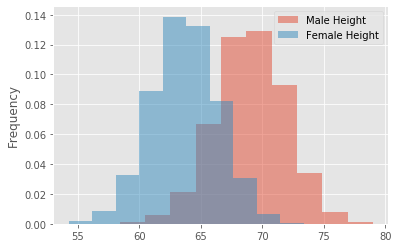

In [21]:
binsize = 10
male_df.Height.plot.hist(bins = binsize, density = True,  alpha = 0.5, label ="Male Height")
female_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.5, label = 'Female Height')
plt.legend()

Males are generally taller than females. There is overlap from about 60" to 70". The right and left tail outliers are typically male and female respectively.

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

In [31]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    # Initialize numpy arrays with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    # plot the calculated curve
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
# np.random.seed(5)
# mu, sigma = 0, 0.1 # mean and standard deviation
# s = np.random.normal(mu, sigma, 100)
# x,y = density(s)
# plt.plot(x,y, label = 'test')
# plt.legend()

##### Add overlapping density plots to the histograms plotted earlier

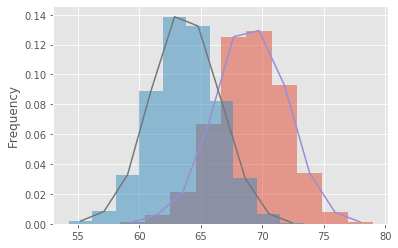

In [34]:
binsize = 10
male_df.Height.plot.hist(bins = binsize, density = True,  alpha = 0.5, label ="Male Height")
female_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.5, label = 'Female Height')
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)

## Repeat the above exercise for male and female weights

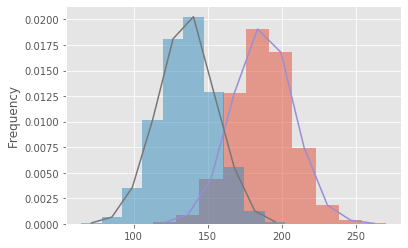

In [36]:
binsize = 10
male_df.Weight.plot.hist(bins = binsize, density = True,  alpha = 0.5, label ="Male Height")
female_df.Weight.plot.hist(bins = binsize, density = True, alpha = 0.5, label = 'Female Height')
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)

## Write your observations in the cell below

#### Record your observations - are these inline with your personal observations?
Yep same thing as for the heights earlier


#### What is the takeaway when comparing male and female heights and weights?
the overlap range is about 125 to shy of 200. The average male is heavier than the average female

## Repeat the above experiments in seaborn and compare with your results

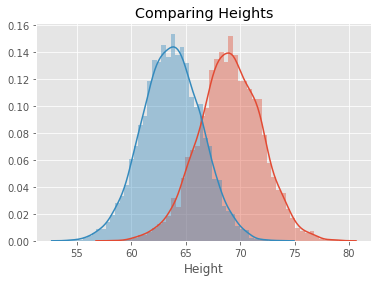

In [37]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

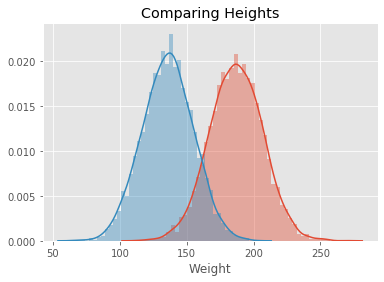

In [38]:
import seaborn as sns
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Comparing Heights')
plt.show()

#### Your comments on the two approaches here. 
Seaborn used many more bins making the distribution looking cleaner
#### are they similar? what makes them different if they are?
they are the same thing one just has better resolution due to more bins. Seaborn is much faster to use.

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.